# Food Price Prediction (2017–2021)

Predicting Nigerian staple food prices using linear regression and lag features.


##  Problem Statement
Food prices in Nigeria have changed significantly between 2017 and 2021, with clear spikes and drops due to events like COVID-19.

**Goal:**  
Build a simple ML model that forecasts future prices for key staple foods — to help traders plan what to buy or sell.

Dataset: Monthly prices for ~40 food items from 2017 to 2021.


## 📦 Step 1: Load & Prepare Data

- Loaded raw dataset (2017–2021 prices, monthly columnsit.
- Checked for missing values; dropped rows/items with nulls to keep dataset balanced.
- Converted from wide format (columns = months) to long f, helps extract features later.
- Found an extra header row → removed it.
- Filtered dataset to include only Nigerian staple foods (e.g., rice, beans, yam).
- Renamed messy item names to cleaner names for readability.
.rmat:


In [4]:
#load data
import pandas as pd
df = pd.read_csv("food-prices-for-nigeria-2017-2021.csv")
df

,ItemLabels,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Lowest,Highest,Month-on-Month,Year-on-Year
0,Agric eggs medium size,512.99,520.16,507.69,518.66,522.71,514.66,498.50,485.19,487.51,...,556.47,577.55,585.64,604.99,614.89,629.82,Borno (411.67),Bayelsa (800),2.43,27.31
1,Agric eggs(medium size price of one),47.42,42.90,43.93,46.22,45.73,45.28,44.32,42.92,45.72,...,51.22,52.73,53.20,54.62,55.49,57.35,Taraba (41.51),Ogun (70.06),3.35,28.15
2,"Beans brown,sold loose",353.60,337.11,353.28,357.19,365.86,374.26,382.35,370.25,404.84,...,471.24,485.44,496.03,492.13,478.76,490.19,Bauchi (234.29),Anambra (899.4),2.39,46.47
3,Beans:white black eye. sold loose,305.53,309.85,318.45,324.04,332.28,339.64,343.96,335.71,358.13,...,431.79,444.21,457.98,461.59,464.74,476.76,Bauchi (235.22),Ebonyi (887.77),2.59,54.61
4,Beef Bone in,1001.24,995.65,1010.29,1035.45,1123.65,1129.02,1128.94,1151.38,1078.49,...,1220.33,1262.10,1274.20,1320.73,1339.77,1366.24,Taraba (975.2),Abuja (1885.99),1.98,26.37
5,"Beef,boneless",1249.48,1270.67,1281.71,1323.10,1378.91,1393.42,1376.91,1276.85,1324.93,...,1567.26,1660.76,1698.18,1768.14,1768.78,1812.03,Gombe (1248.2),Abuja (2533.33),2.45,30.01
6,Bread sliced 500g,302.87,299.75,297.51,296.63,307.70,320.58,314.47,304.20,310.62,...,355.78,361.11,366.69,384.73,382.77,404.20,Bauchi (246.67),Abuja (605.75),5.60,23.04
7,Bread unsliced 500g,270.25,264.86,262.33,277.69,282.26,286.78,285.55,258.70,286.33,...,324.03,335.67,342.78,351.95,359.60,366.46,Plateau (238.75),Abuja (633.58),1.91,19.36
8,Broken Rice (Ofada),377.41,392.04,421.54,425.53,460.10,472.29,473.40,415.34,431.59,...,472.07,477.08,477.39,473.75,475.54,480.65,Nasarawa (301.54),Lagos (842.5),1.08,3.91
9,Catfish (obokun) fresh,899.58,885.13,884.15,886.65,900.73,916.55,910.57,921.17,894.52,...,1140.68,1174.02,1204.60,1232.25,1242.54,1276.58,Yobe (731.82),Abia (2000.35),2.74,19.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ItemLabels      44 non-null     object 
 1   Jan-17          43 non-null     float64
 2   Feb-17          43 non-null     float64
 3   Mar-17          43 non-null     float64
 4   Apr-17          43 non-null     float64
 5   May-17          43 non-null     float64
 6   Jun-17          43 non-null     float64
 7   Jul-17          43 non-null     float64
 8   Aug-17          43 non-null     float64
 9   Sep-17          43 non-null     float64
 10  Oct-17          43 non-null     float64
 11  Nov-17          43 non-null     float64
 12  Dec-17          43 non-null     float64
 13  Jan-18          43 non-null     float64
 14  Feb-18          43 non-null     float64
 15  Mar-18          43 non-null     float64
 16  Apr-18          43 non-null     float64
 17  May-18          43 non-null     float

In [6]:
 # Remove columns we don't need
df_small = df.drop(columns=["Month-on-Month","Year-on-Year","Lowest","Highest"],axis=1)

# Reshape: Melt wide to long
df_long = df_small.melt(
    id_vars='ItemLabels',
    var_name='Date',
    value_name='Price'
)

#view new shape
df_long.head()

,ItemLabels,Date,Price
0,Agric eggs medium size,Jan-17,512.99
1,Agric eggs(medium size price of one),Jan-17,47.42
2,"Beans brown,sold loose",Jan-17,353.60
3,Beans:white black eye. sold loose,Jan-17,305.53
4,Beef Bone in,Jan-17,1001.24


In [7]:
#Rename ItemLabels to items (just my preference, ItemLabels works fine as well)
df_long.rename(columns={"ItemLabels": "Items"}, inplace= True)
df_long.head()

,Items,Date,Price
0,Agric eggs medium size,Jan-17,512.99
1,Agric eggs(medium size price of one),Jan-17,47.42
2,"Beans brown,sold loose",Jan-17,353.60
3,Beans:white black eye. sold loose,Jan-17,305.53
4,Beef Bone in,Jan-17,1001.24


In [8]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Items   2596 non-null   object 
 1   Date    2655 non-null   object 
 2   Price   2537 non-null   float64
dtypes: float64(1), object(2)
memory usage: 62.4+ KB


In [9]:
#check null values
df_long[df_long["Items"].isna() ]

,Items,Date,Price
43,NaN,Jan-17,NaN
88,NaN,Feb-17,NaN
133,NaN,Mar-17,NaN
178,NaN,Apr-17,NaN
223,NaN,May-17,NaN
268,NaN,Jun-17,NaN
313,NaN,Jul-17,NaN
358,NaN,Aug-17,NaN
403,NaN,Sep-17,NaN
448,NaN,Oct-17,NaN


In [10]:
#drop all rows with no value in the items column
df_long = df_long.dropna(subset=['Items'])

#view info to see where other nulls are
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2596 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Items   2596 non-null   object 
 1   Date    2596 non-null   object 
 2   Price   2537 non-null   float64
dtypes: float64(1), object(2)
memory usage: 81.1+ KB


In [11]:
#check nulls in Price
df_long[ df_long['Price'].isna() ]

,Items,Date,Price
44,Source: The Nigeria Bureau of Statistics,Jan-17,NaN
89,Source: The Nigeria Bureau of Statistics,Feb-17,NaN
134,Source: The Nigeria Bureau of Statistics,Mar-17,NaN
179,Source: The Nigeria Bureau of Statistics,Apr-17,NaN
224,Source: The Nigeria Bureau of Statistics,May-17,NaN
269,Source: The Nigeria Bureau of Statistics,Jun-17,NaN
314,Source: The Nigeria Bureau of Statistics,Jul-17,NaN
359,Source: The Nigeria Bureau of Statistics,Aug-17,NaN
404,Source: The Nigeria Bureau of Statistics,Sep-17,NaN
449,Source: The Nigeria Bureau of Statistics,Oct-17,NaN


In [12]:
#drop all rows with null price values(extra header rows)
df_long = df_long.dropna(subset= ['Price'])

df_long.info() #now all rows correspond

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 0 to 2652
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Items   2537 non-null   object 
 1   Date    2537 non-null   object 
 2   Price   2537 non-null   float64
dtypes: float64(1), object(2)
memory usage: 79.3+ KB


In [13]:
# Convert date column to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'], format= '%b-%y')
df_long.head()

,Items,Date,Price
0,Agric eggs medium size,2017-01-01,512.99
1,Agric eggs(medium size price of one),2017-01-01,47.42
2,"Beans brown,sold loose",2017-01-01,353.60
3,Beans:white black eye. sold loose,2017-01-01,305.53
4,Beef Bone in,2017-01-01,1001.24


In [14]:
#view unque items in data
df_long['Items'].unique()

array(['Agric eggs medium size', 'Agric eggs(medium size price of one)',
       'Beans brown,sold loose', 'Beans:white black eye. sold loose',
       'Beef Bone in', 'Beef,boneless', 'Bread sliced 500g',
       'Bread unsliced 500g', 'Broken Rice (Ofada)',
       'Catfish (obokun) fresh', 'Catfish :dried', 'Catfish Smoked',
       'Chicken Feet', 'Chicken Wings', 'Dried Fish Sardine',
       'Evaporated tinned milk carnation 170g',
       'Evaporated tinned milk(peak), 170g', 'Frozen chicken',
       'Gari white,sold loose', 'Gari yellow,sold loose',
       'Groundnut oil: 1 bottle, specify bottle', 'Iced Sardine',
       'Irish potato', 'Mackerel : frozen',
       'Maize grain white sold loose', 'Maize grain yellow sold loose',
       'Mudfish (aro) fresh', 'Mudfish : dried', 'Onion bulb',
       'Palm oil: 1 bottle,specify bottle', 'Plantain(ripe)',
       'Plantain(unripe)', 'Rice agric sold loose',
       'Rice local sold loose', 'Rice Medium Grained',
       'Rice,imported high qu

In [15]:
#create list of staple foods
staples = ['Gari white,sold loose',
           'Gari yellow,sold loose',
           'Maize grain white sold loose', 
           'Maize grain yellow sold loose',
           'Rice agric sold loose',
           'Rice local sold loose',
           'Rice Medium Grained',
           'Rice,imported high quality sold loose',
           'Vegetable oil:1 bottle,specify bottle',
           'Yam tuber',
           'Beans brown,sold loose',
           'Beans:white black eye. sold loose',
           'Bread unsliced 500g',]
#filter by staples
df_staples = df_long[ df_long['Items'].isin(staples) ].copy()

In [16]:
#clean item names
#create a dictionary with current names as key, and new names as the value
name_map = {'Gari white,sold loose': 'White Garri',
            'Gari yellow,sold loose': 'Yellow Garri',
            'Maize grain white sold loose': 'White Maize',
            'Maize grain yellow sold loose': 'Yellow Maize',
            'Rice agric sold loose': 'Agric Rice',
            'Rice local sold loose': 'Local Rice', 
            'Rice Medium Grained': 'Medium Grain Rice',
            'Rice,imported high quality sold loose': 'Imported Rice',
            'Vegetable oil:1 bottle,specify bottle': 'Vegetable oil',
            'Yam tuber': 'Yam',
            'Beans brown,sold loose': 'Brown Beans', 
            'Beans:white black eye. sold loose': 'White Beans',
            'Bread unsliced 500g': 'Bread',
}

#create a new column with the cleaned item names
df_staples['Items_Clean'] = df_staples['Items'].map(name_map)
df_staples.head()

,Items,Date,Price,Items_Clean
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans
7,Bread unsliced 500g,2017-01-01,270.25,Bread
18,"Gari white,sold loose",2017-01-01,219.56,White Garri
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri


In [17]:
#view statistics of each item
df_staples.groupby('Items_Clean')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Items_Clean,,,,,,,,
Agric Rice,59.0,370.278814,53.919840,310.03,323.040,351.09,419.460,469.53
Bread,59.0,288.229661,23.540489,258.70,274.405,278.66,289.745,366.46
Brown Beans,59.0,367.621356,57.570427,267.81,327.030,368.98,396.035,496.03
Imported Rice,59.0,434.795593,75.034526,352.83,370.680,409.20,508.920,568.75
Local Rice,59.0,327.759492,51.212330,271.10,280.795,313.10,382.880,421.02
Medium Grain Rice,59.0,366.362034,55.761917,304.90,317.400,344.40,419.235,476.67
Vegetable oil,59.0,573.679322,89.724844,485.05,514.450,546.85,586.520,876.47
White Beans,59.0,333.726271,54.663086,241.74,296.185,332.28,356.180,476.76
White Garri,59.0,226.319322,56.027572,145.31,166.625,216.72,273.850,329.20


## Step 2: Exploratory Data Analysis (EDA)

- Visualized monthly price trends for major staple foods from 2017 to 2021.
- Found that prices were relatively flat or slightly declining up until early 2020.
- From 2020 onward, prices jumped sharply, most likely because of the pandemic and rising inflation.
- This led us to add lag features, so the model would know what prices were in recent months and use that to predict the next price.


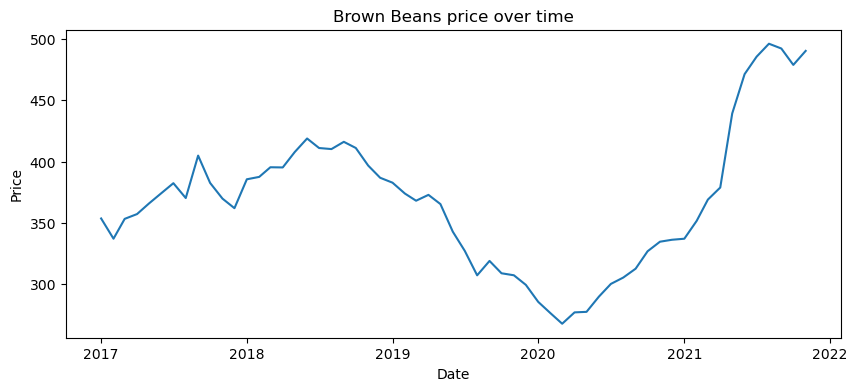

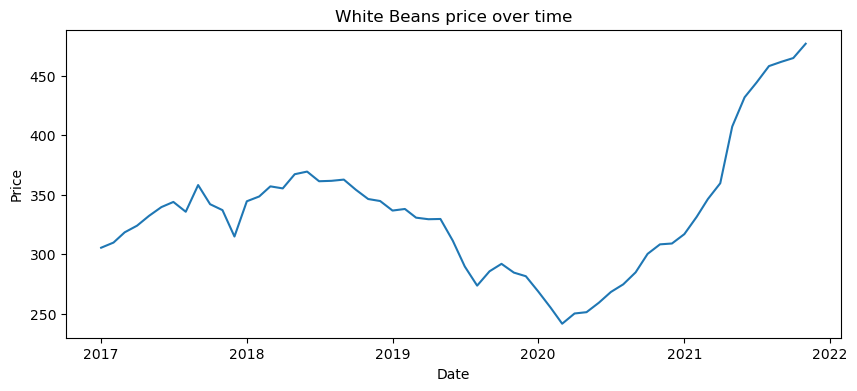

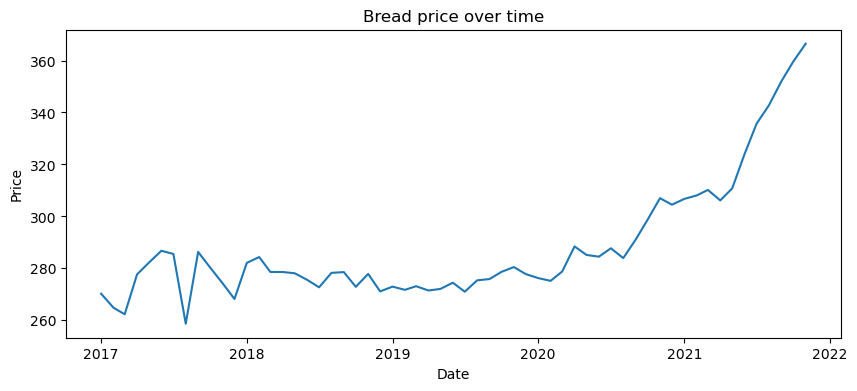

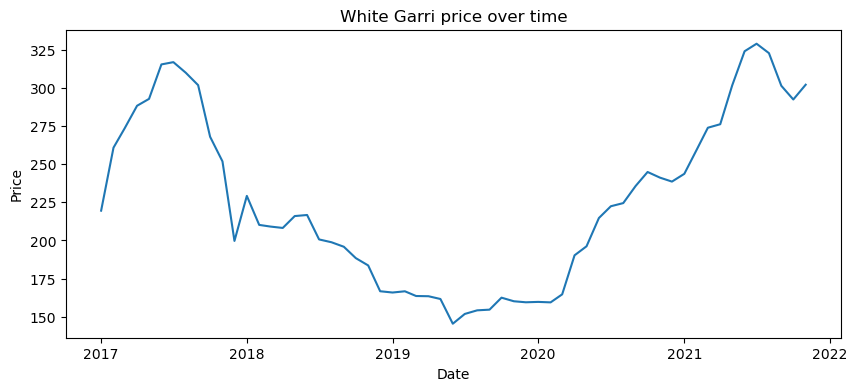

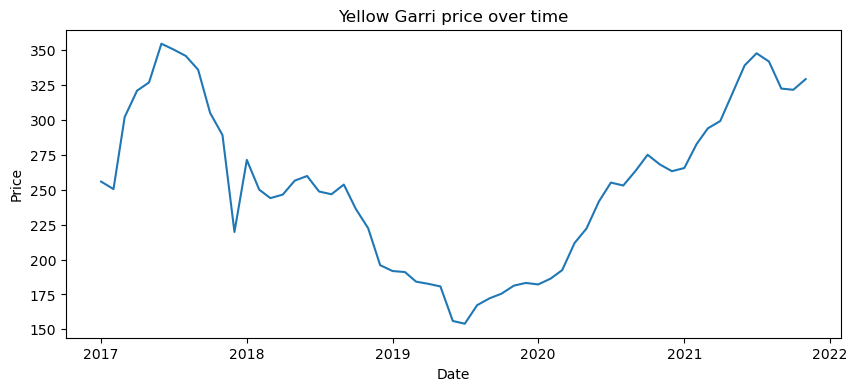

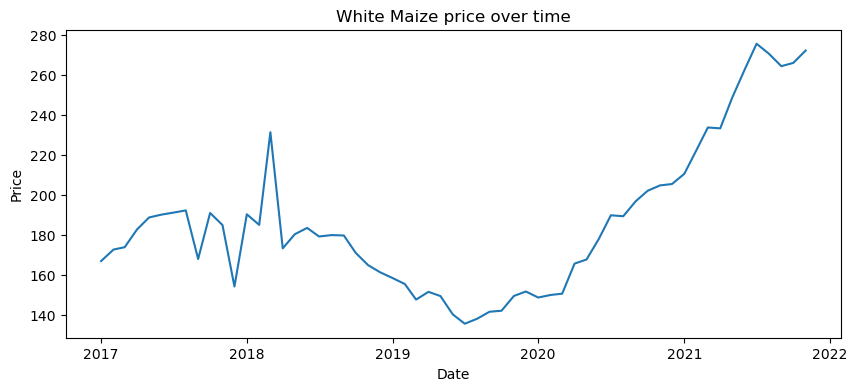

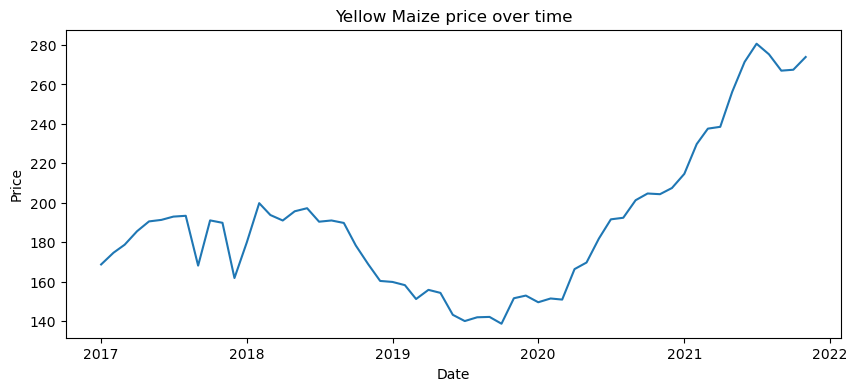

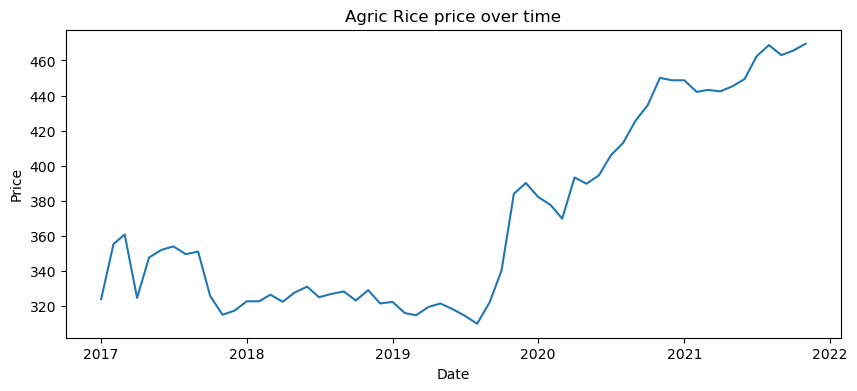

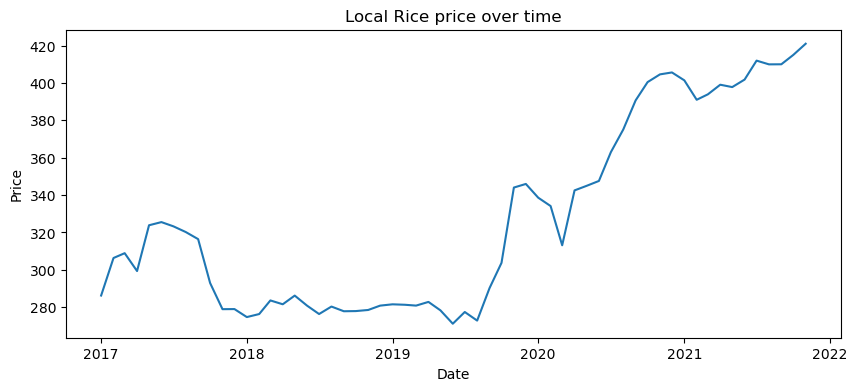

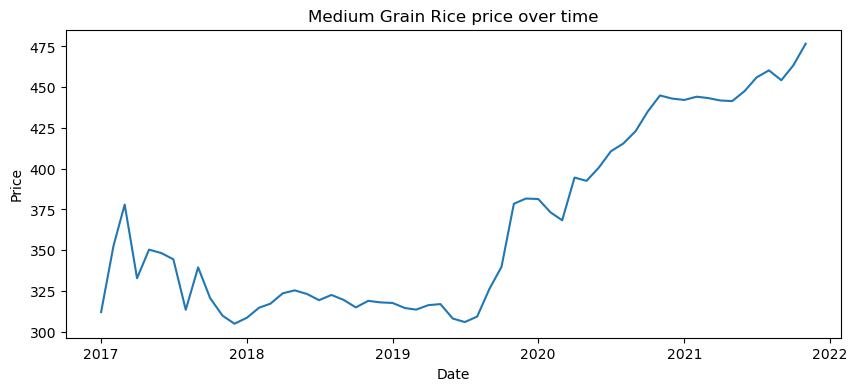

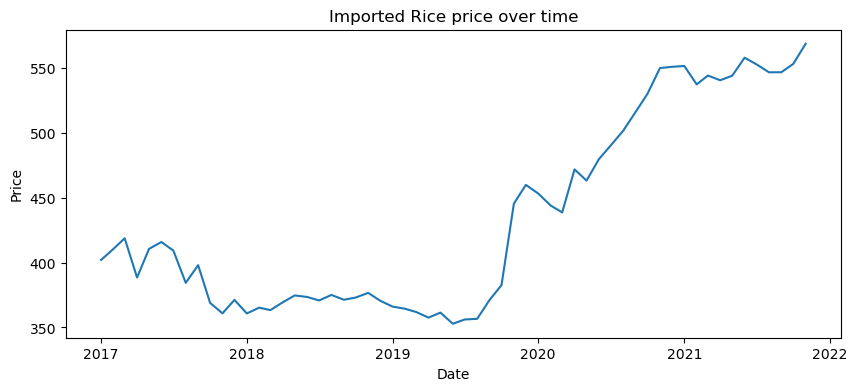

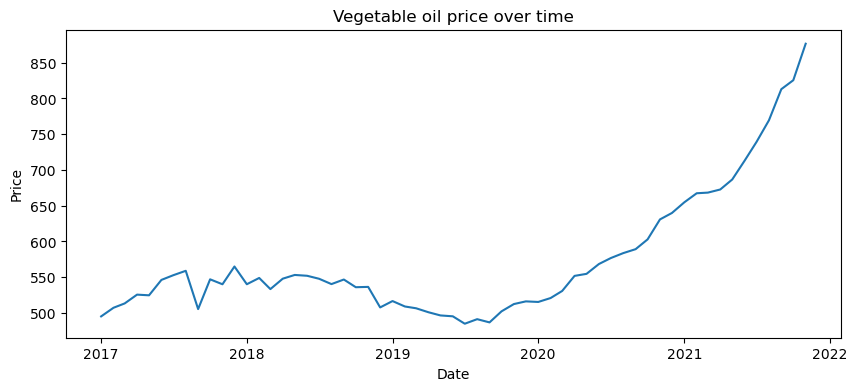

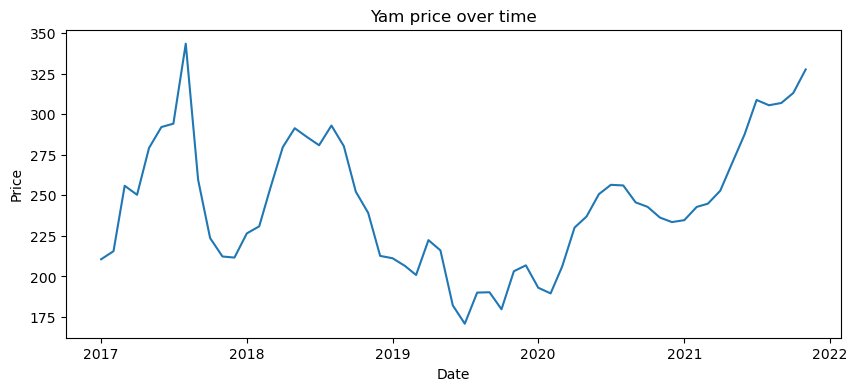

In [19]:
import matplotlib.pyplot as plt

for item in df_staples["Items_Clean"].unique():
    subset = df_staples[ df_staples["Items_Clean"] == item ]
    plt.figure(figsize=(10,4))
    plt.plot(subset['Date'], subset['Price'])
    plt.title(f'{item} price over time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

## Step 3: Check Autocorrelation (ACF Plot)
- Plotted the **autocorrelation function (ACF)** to see how strongly current prices are correlated with previous months.
- Found that prices had high autocorrelation (≥ 0.75) up to about 3 months back.
- Based on this, added 3 lag features: `price_lag1`, `price_lag2`, and `price_lag3`.


<Figure size 1000x400 with 0 Axes>

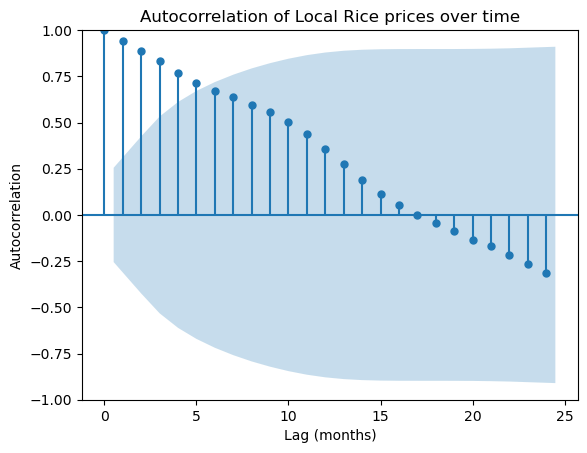

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

# Filter data to just local rice
rice_data = df_staples[df_staples['Items_Clean'] == 'Local Rice']

# Plot ACF
plt.figure(figsize=(10,4))
plot_acf(rice_data['Price'], lags=24)  # lags=24 to see up to 2 years if monthly data
plt.title('Autocorrelation of Local Rice prices over time')
plt.xlabel('Lag (months)')
plt.ylabel('Autocorrelation')
plt.show()


## Step 4: Feature Engineering
- Extracted `month`, `year`, and `quarter` from the date.
- Added lag features (last 3 months’ prices) to help the model “remember” recent trends.
- Encoded item names as dummy variables (one-hot encoding).
- Dropped the first dummy column to avoid **perfect multicollinearity** (having redundant features that add up exactly and confuse the model).
- Chose final features based on what we expected would help predict price from given data:
  - Time (month, year, quarter)
  - Recent price trends (lag features)
  - Item identity (dummy variables)


In [23]:
#add time features(month, year, quarter)
df_staples['Year'] = df_staples['Date'].dt.year
df_staples['Month'] = df_staples['Date'].dt.month
df_staples['Quarter'] = df_staples['Date'].dt.quarter
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans,2017,1,1
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans,2017,1,1
7,Bread unsliced 500g,2017-01-01,270.25,Bread,2017,1,1
18,"Gari white,sold loose",2017-01-01,219.56,White Garri,2017,1,1
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri,2017,1,1


In [24]:
#create lag columns
max_lag = 3
for lag in range(1, max_lag+1):
    df_staples[f'Price_lag{lag}'] = df_staples.groupby("Items_Clean")["Price"].shift(lag)
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans,2017,1,1,NaN,NaN,NaN
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans,2017,1,1,NaN,NaN,NaN
7,Bread unsliced 500g,2017-01-01,270.25,Bread,2017,1,1,NaN,NaN,NaN
18,"Gari white,sold loose",2017-01-01,219.56,White Garri,2017,1,1,NaN,NaN,NaN
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri,2017,1,1,NaN,NaN,NaN


In [25]:
#drop nulls(rows with no previous months data)
df_staples.dropna(inplace=True)
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3
137,"Beans brown,sold loose",2017-04-01,357.19,Brown Beans,2017,4,2,353.28,337.11,353.60
138,Beans:white black eye. sold loose,2017-04-01,324.04,White Beans,2017,4,2,318.45,309.85,305.53
142,Bread unsliced 500g,2017-04-01,277.69,Bread,2017,4,2,262.33,264.86,270.25
153,"Gari white,sold loose",2017-04-01,288.45,White Garri,2017,4,2,273.67,260.94,219.56
154,"Gari yellow,sold loose",2017-04-01,320.92,Yellow Garri,2017,4,2,302.05,250.45,255.83


In [26]:
#one-hot encoding(using dummy variables for item names)
dummies = pd.get_dummies(df_staples['Items_Clean'], prefix='Items_Clean', drop_first=True)
df_staples = pd.concat([df_staples,dummies], axis=1)
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3,...,Items_Clean_Imported Rice,Items_Clean_Local Rice,Items_Clean_Medium Grain Rice,Items_Clean_Vegetable oil,Items_Clean_White Beans,Items_Clean_White Garri,Items_Clean_White Maize,Items_Clean_Yam,Items_Clean_Yellow Garri,Items_Clean_Yellow Maize
137,"Beans brown,sold loose",2017-04-01,357.19,Brown Beans,2017,4,2,353.28,337.11,353.60,...,False,False,False,False,False,False,False,False,False,False
138,Beans:white black eye. sold loose,2017-04-01,324.04,White Beans,2017,4,2,318.45,309.85,305.53,...,False,False,False,False,True,False,False,False,False,False
142,Bread unsliced 500g,2017-04-01,277.69,Bread,2017,4,2,262.33,264.86,270.25,...,False,False,False,False,False,False,False,False,False,False
153,"Gari white,sold loose",2017-04-01,288.45,White Garri,2017,4,2,273.67,260.94,219.56,...,False,False,False,False,False,True,False,False,False,False
154,"Gari yellow,sold loose",2017-04-01,320.92,Yellow Garri,2017,4,2,302.05,250.45,255.83,...,False,False,False,False,False,False,False,False,True,False


In [27]:
features = ['Year','Month','Quarter','Price_lag1','Price_lag2','Price_lag3']
features += [col for col in df_staples.columns if col.startswith('Items_Clean_')]
X = df_staples[features]
y = df_staples['Price']

## Step 5: Build & Train Model
- Used **Linear Regression**:data showed mostly linear trends, and this model is simple,  and effective
- Split data into training and testing sets (80/20).
- Trained the model using month, year, quarter, lag prices, and item dummy variables.


In [29]:
from sklearn.model_selection import train_test_split

# First, make sure it's sorted by date
df_staples = df_staples.sort_values('Date')

# split data
train_size = int(len(df_staples) * 0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [30]:
from sklearn.linear_model import LinearRegression

#create model
model = LinearRegression()

#train model on past data
model.fit(X_train, y_train)

#predict future prices
y_pred = model.predict(X_test)

## Step 6: Evaluate Model
- **Mean Absolute Error (MAE):** ~8.67  
- **Root Mean Squared Error (RMSE):** ~12.31  
- **R² Score:** ~0.99 → very high, shows the model explains nearly all variance in past prices.
- Plotted actual vs. predicted prices → points followed the diagonal line closely, confirming strong fit.


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 8.67
RMSE: 12.31
R²: 0.99


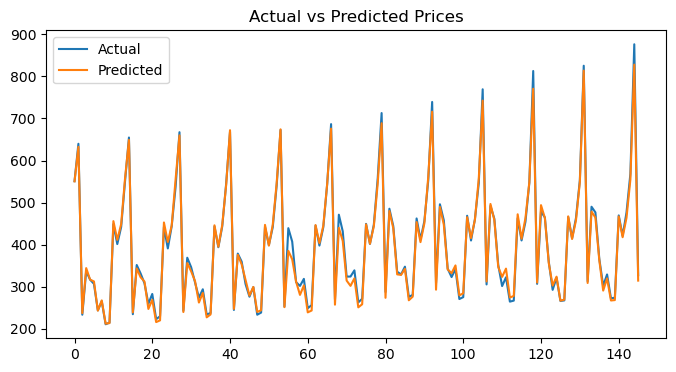

In [33]:
#plot actual prices vs predicted prices

plt.figure(figsize=(8,4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

## Step 7: Forecast Future Prices
- For each staple item, took the last known row (with latest price and lag values).
- Predicted next month’s price → updated lag features → predicted the month after, and so on.
- Built a rolling forecast covering several future months.
- Compiled predictions into a single dataframe, showing forecasted prices for each item.


In [35]:
#view last rows
df_staples.tail()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3,...,Items_Clean_Imported Rice,Items_Clean_Local Rice,Items_Clean_Medium Grain Rice,Items_Clean_Vegetable oil,Items_Clean_White Beans,Items_Clean_White Garri,Items_Clean_White Maize,Items_Clean_Yam,Items_Clean_Yellow Garri,Items_Clean_Yellow Maize
2613,Beans:white black eye. sold loose,2021-11-01,476.76,White Beans,2021,11,4,464.74,461.59,457.98,...,False,False,False,False,True,False,False,False,False,False
2612,"Beans brown,sold loose",2021-11-01,490.19,Brown Beans,2021,11,4,478.76,492.13,496.03,...,False,False,False,False,False,False,False,False,False,False
2650,"Vegetable oil:1 bottle,specify bottle",2021-11-01,876.47,Vegetable oil,2021,11,4,825.46,812.94,769.45,...,False,False,False,True,False,False,False,False,False,False
2634,Maize grain white sold loose,2021-11-01,272.42,White Maize,2021,11,4,266.23,264.59,270.79,...,False,False,False,False,False,False,True,False,False,False
2652,Yam tuber,2021-11-01,327.53,Yam,2021,11,4,313.05,306.87,305.48,...,False,False,False,False,False,False,False,True,False,False


In [36]:

last_rows = []#holds all the last rows for all the items
dummy_cols = [col for col in df_staples.columns if col.startswith("Items_Clean_")] #holds item dummy columns
items = [col.replace('Items_Clean_', '') for col in dummy_cols]# Extract item names back from dummy column names to prevent misalignment
for item in items:
    item_name = f'Items_Clean_{item}'
    
    # Only proceed if we actually have this dummy column (we dropped one item earlier to avoid multicollinearity)
    if item_name in dummy_cols:
        
        # Find the last available row for this item (i.e., the most recent month we have data for)
        # We need this to build features for forecasting the next months
        last_row = df_staples[ df_staples[item_name] == 1 ].iloc[-1].copy()
        # Save this last row so we can use its lag values, year, month etc. to forecast forward
        last_rows.append(last_row)

forecasts = [] #to hold list of predictions for each food item for each month

n = 5 #number of months to predict for
for step in range(1, n+1):
    input_rows = [] #a list of dictionaries, that contain input for each item. input -> data for each item to feed the model on order to make predictions
    for row in last_rows:
        next_year = row['Year'] 
        next_month = row['Month'] + 1
        if next_month > 12:
            next_month = 1
            next_year += 1
        quarter = pd.Timestamp(year=next_year, month=next_month, day=1).quarter
    
        input = {
            'Year': next_year,
            'Month': next_month,
            'Quarter': quarter,
            'Price_lag1': row['Price'],
        }
        for i in range(2,4):
            input[f'Price_lag{i}'] = row[f'Price_lag{i-1}'] #add price lags 2 and 3 to the features 
        
        for cols in row.index:
            if cols.startswith('Items_Clean_'):
                input[cols] = row[cols] #add the dummy columns to the input
                
        #save input data for item
        input_rows.append(input)
                
        input_df = pd.DataFrame(input_rows) #convert input rows to Dataframe to feed model
        predictions = model.predict(input_df) #make predictions
    
        #create a dictionary to structure the predictions. the item, price, date
    for i,rows in enumerate(input_rows):
        forecast = {
            "Item": items[i],
            "Year": rows['Year'],
            "Month": rows["Month"],
            "Price": predictions[i],
        }
        forecasts.append(forecast)

        # Update the last_row info for this item so it’s ready for the next forecast step
        # - Move old lags forward (lag2 → lag3, lag1 → lag2)
        # - Add the newly predicted price as lag1 for the next step
        # - Also update Year and Month so the next forecast is for the month after

    
        #for next pre
        last_rows[i]['Price'] = predictions[i]
        
        last_rows[i]['Price_lag3'] = last_rows[i]['Price_lag2']
        last_rows[i]['Price_lag2'] = last_rows[i]['Price_lag1']
        last_rows[i]['Price_lag1'] = last_rows[i]['Price']
        
        
        last_rows[i]['Year'] = rows['Year'] 
        last_rows[i]['Month'] = rows['Month'] 

    

In [37]:
df_forecasts = pd.DataFrame(forecasts)
df_forecasts #view predictions

,Item,Year,Month,Price
0,Bread,2021,12,369.026956
1,Brown Beans,2021,12,486.794704
2,Imported Rice,2021,12,570.006687
3,Local Rice,2021,12,423.387183
4,Medium Grain Rice,2021,12,477.965747
5,Vegetable oil,2021,12,871.021145
6,White Beans,2021,12,474.965533
7,White Garri,2021,12,300.501967
8,White Maize,2021,12,273.451111
9,Yam,2021,12,328.171151


### Visualizing last known prices vs forecasted prices

After generating the forecast, it helps to see how the predicted prices compare 
to the recent actual prices we observed in our dataset.

Below, for each item, we show:
- The last 3–4 months of actual prices (from our original dataset)
- The next 5 months of predicted prices from the model

The red dashed line shows where forecasting starts, so we can easily spot whether the model 
is predicting the price trend to continue, flatten out, or reverse.

This visualization makes it easier to validate that predictions generally follow recent momentum,
and helps explain the model's output to non-technical audiences.


In [39]:
viz_data = []

for item in items:
    col_name = f'Items_Clean_{item}'
    # get last row where this dummy col is 1
    last_row = df_staples[df_staples[col_name] == 1].iloc[-1]
    
    known = [
        last_row['Price_lag3'],
        last_row['Price_lag2'],
        last_row['Price_lag1'],
        last_row['Price'],
    ]
    
    # get predicted prices from forecasts list
    predicted = [f['Price'] for f in forecasts if f['Item'] == item]

    viz_data.append({
        'Item': item,
        'Known': known,
        'Predicted': predicted
    })


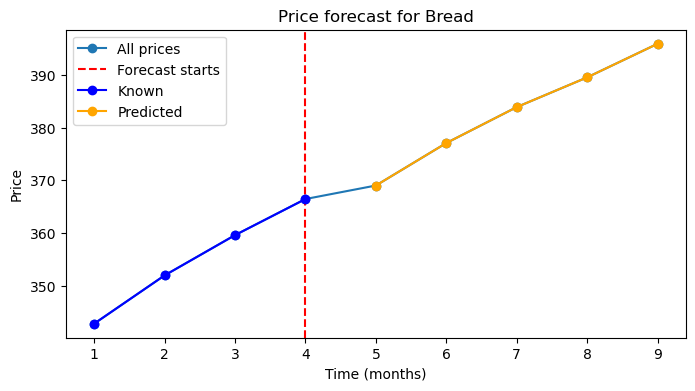

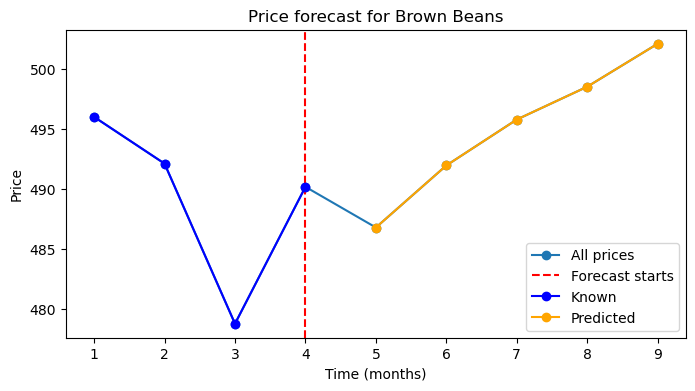

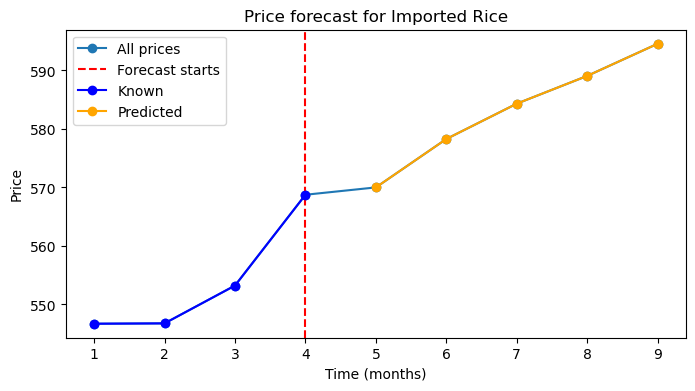

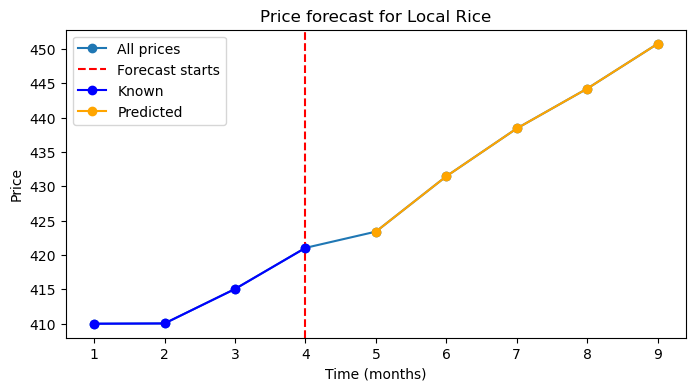

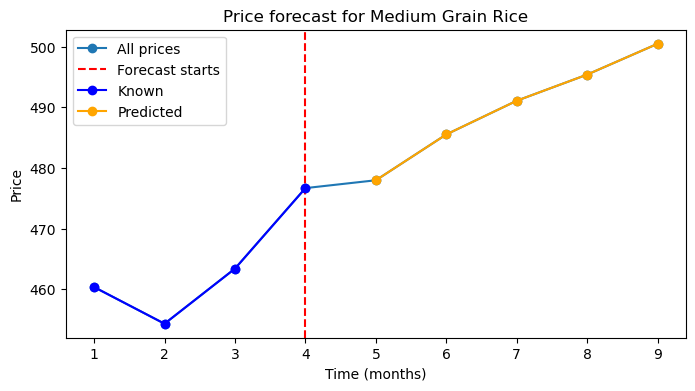

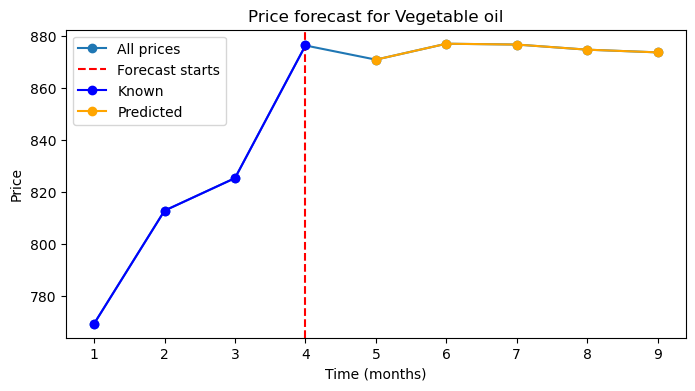

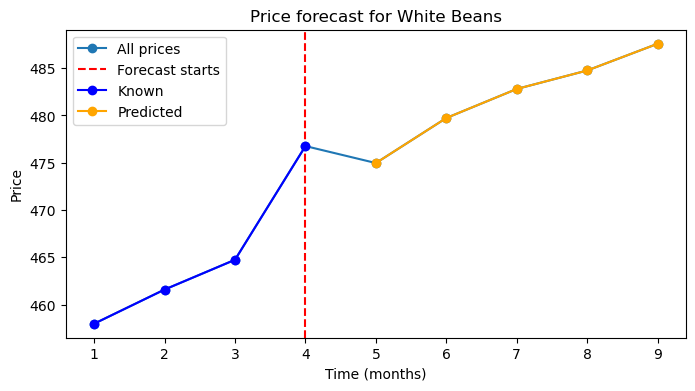

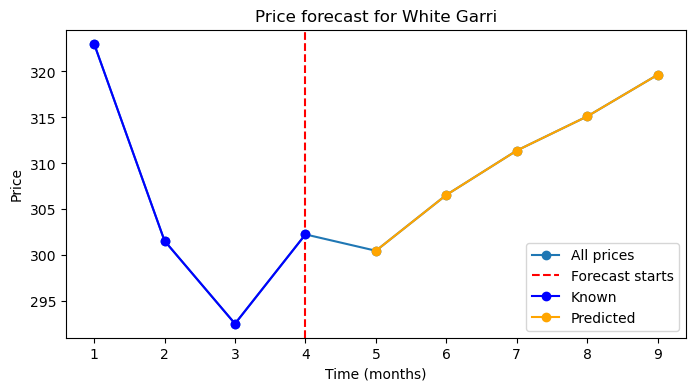

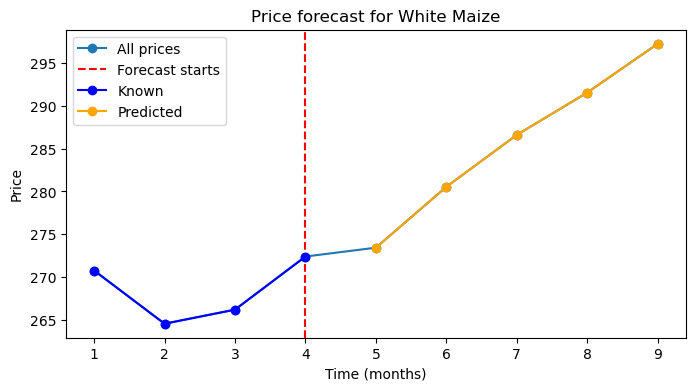

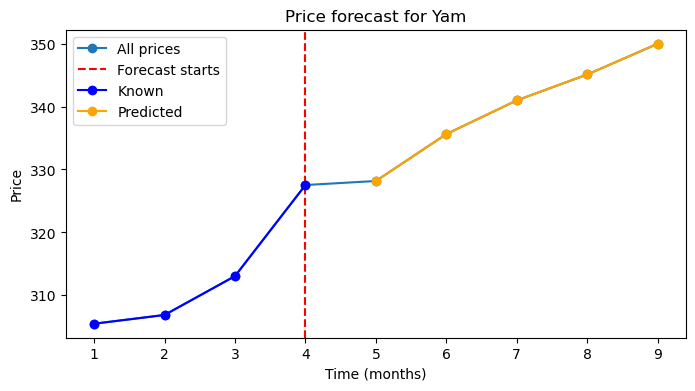

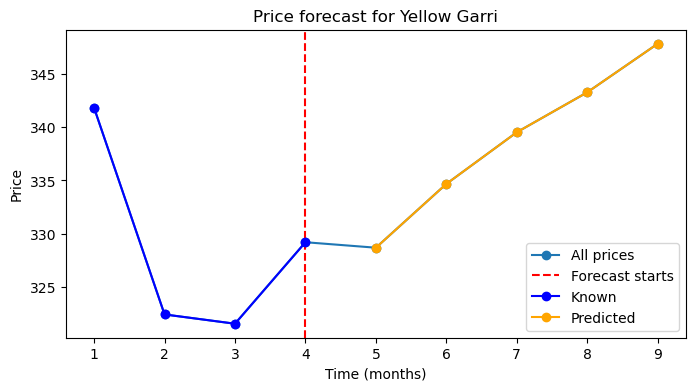

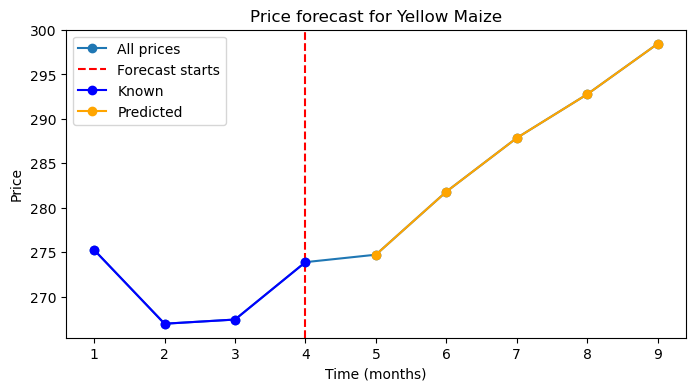

In [40]:
for entry in viz_data:
    full_series = entry['Known'] + entry['Predicted']
    
    plt.figure(figsize=(8,4))
    plt.plot(range(1, len(full_series)+1), full_series, marker='o', label='All prices')
    
    plt.axvline(x=len(entry['Known']), color='red', linestyle='--', label='Forecast starts')
    
    plt.plot(range(1, len(entry['Known'])+1), entry['Known'], marker='o', color='blue', label='Known')
    plt.plot(range(len(entry['Known'])+1, len(full_series)+1), entry['Predicted'], marker='o', color='orange', label='Predicted')

    plt.title(f"Price forecast for {entry['Item']}")
    plt.xlabel('Time (months)')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


## Conclusion

- Food prices were fairly stable until around 2020, then surged sharply — likely due to pandemic-era supply shocks and inflation.
- To help the model “remember” those recent jumps, we engineered lag features (previous months’ prices).  
- We used an autocorrelation (ACF) plot to decide on using the last 3 months as lags.
- The final Linear Regression model predicts short-term price trends quite accurately (R² ≈ 0.99).
- These forecasts can help traders plan what to stock up on or sell — but they’re based on past data and assume market conditions remain roughly similar. Big shocks (e.g., new crises) wouldn’t be captured.
